<a href="https://colab.research.google.com/github/cdevrywhr/Data-Scientist-with-R/blob/main/Asosiasi_Algoritma_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
install.packages("arules")
install.packages("arulesViz")
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [53]:
library(arules)
library(arulesViz)
library(RColorBrewer)

In [54]:
df <- read.transactions(file="transaksi_dqlab_retail.tsv", format = "single", sep="\t", cols=c(1,2), skip=1)
df

transactions in sparse format with
 3450 transactions (rows) and
 69 items (columns)

In [55]:
avar <- apriori(df, parameter=list(supp=10/length(df), conf=0.1,minlen=2,maxlen=3,target="rules"))
avar

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
        0.1    0.1    1 none FALSE            TRUE       5 0.002898551      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[69 item(s), 3450 transaction(s)] done [0.00s].
sorting and recoding items ... [68 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(df, parameter = list(supp = 10/length(df), conf = 0.1, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.01s].
writing ... [39832 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


set of 39832 rules 

In [68]:
inspect(head(sort(avar,by='count',decreasing = TRUE),n=10))


     lhs                     rhs                  support   confidence
[1]  {Serum Vitamin}      => {Shampo Biasa}       0.3162319 0.6474777 
[2]  {Shampo Biasa}       => {Serum Vitamin}      0.3162319 0.5257831 
[3]  {Baju Batik Wanita}  => {Shampo Biasa}       0.2463768 0.6478659 
[4]  {Shampo Biasa}       => {Baju Batik Wanita}  0.2463768 0.4096386 
[5]  {Baju Kemeja Putih}  => {Shampo Biasa}       0.2437681 0.6701195 
[6]  {Shampo Biasa}       => {Baju Kemeja Putih}  0.2437681 0.4053012 
[7]  {Sepatu Sandal Anak} => {Shampo Biasa}       0.2237681 0.7269303 
[8]  {Shampo Biasa}       => {Sepatu Sandal Anak} 0.2237681 0.3720482 
[9]  {Sepatu Sandal Anak} => {Serum Vitamin}      0.2150725 0.6986817 
[10] {Serum Vitamin}      => {Sepatu Sandal Anak} 0.2150725 0.4403561 
     coverage  lift     count
[1]  0.4884058 1.076529 1091 
[2]  0.6014493 1.076529 1091 
[3]  0.3802899 1.077175  850 
[4]  0.6014493 1.077175  850 
[5]  0.3637681 1.114175  841 
[6]  0.6014493 1.114175  841 
[7]  0.30

**Plot Scatter berdasarkan tingkatan Lift**

**Lift adalah seberapa sering kondisi sebenarnya terjadi dibandingkan dengan perkiraan peluang terjadinya hal itu.**

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



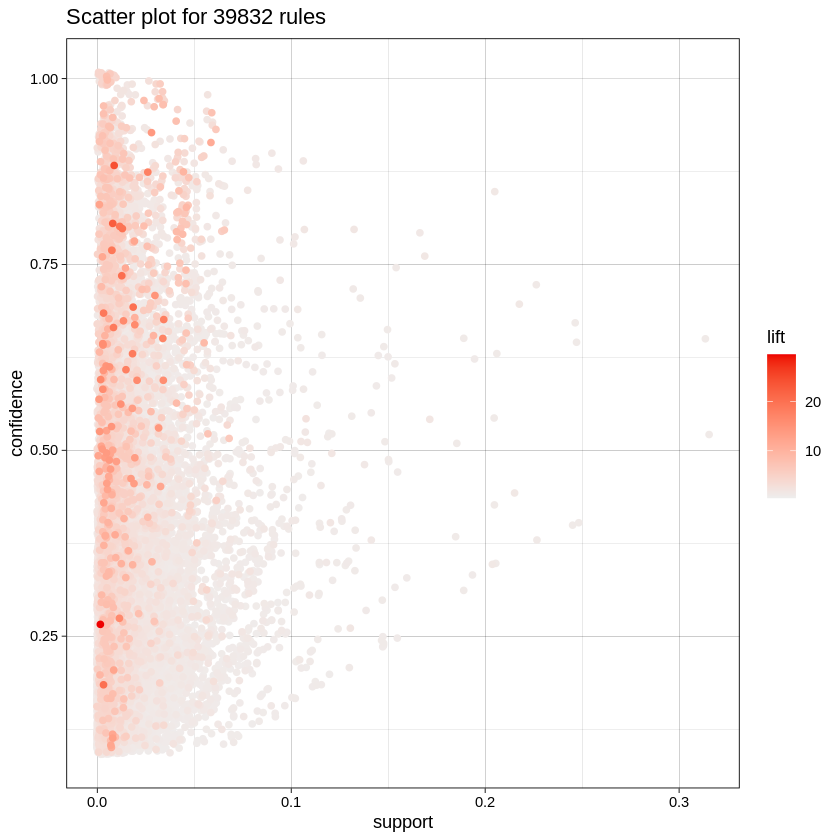

In [63]:
plot(avar)

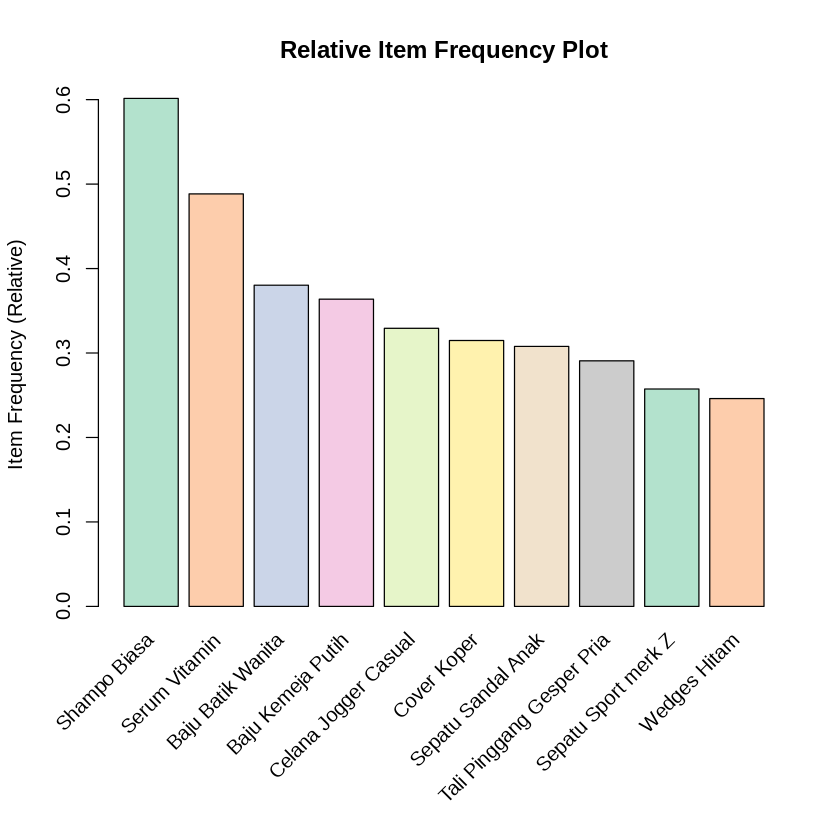

In [69]:
arules::itemFrequencyPlot(df, topN = 10,
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative",
                          ylab = "Item Frequency (Relative)")

**Analisis asosiasi untuk Tas Makeup dan Baju Renang Anak-anak.**

**Dalam Kasus 2 item tersebut adalah item dengan pembelian terlambat atau sedikit pembelian**

In [58]:
tasMakeup <- subset(avar, rhs %in% "Tas Makeup")
bajuRenangaa <- subset(avar, rhs %in% "Baju Renang Pria Anak-anak")

In [59]:
tasMakeup <- head(sort(tasMakeup, decreasing=TRUE, by="lift"),3)
bajuRenangaa <- head(sort(bajuRenangaa, decreasing = TRUE,by="lift"),3)

In [60]:
hasil <- c(tasMakeup,bajuRenangaa)
#save data in txt file
write(hasil,file="Rules_Slow_Moving.txt")

In [61]:
#rules
data <- as(hasil,"data.frame")
View(data)

,rules,support,confidence,coverage,lift,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3798,"{Baju Renang Anak Perempuan,Tas Pinggang Wanita} => {Tas Makeup}",0.010434783,0.8000000,0.01304348,19.57447,36
3804,"{Baju Renang Anak Perempuan,Tas Ransel Mini} => {Tas Makeup}",0.011304348,0.7959184,0.01420290,19.47460,39
3792,"{Baju Renang Anak Perempuan,Celana Pendek Green/Hijau} => {Tas Makeup}",0.010144928,0.7777778,0.01304348,19.03073,35
2290,"{Gembok Koper,Tas Waist Bag} => {Baju Renang Pria Anak-anak}",0.004057971,0.2745098,0.01478261,29.59559,14
2293,"{Flat Shoes Ballerina,Gembok Koper} => {Baju Renang Pria Anak-anak}",0.004057971,0.1866667,0.02173913,20.12500,14
2298,"{Celana Jeans Sobek Wanita,Jeans Jumbo} => {Baju Renang Pria Anak-anak}",0.005507246,0.1210191,0.04550725,13.04737,19
